In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import json 

# Funciones

In [2]:
# Todas las permutaciones posibles de una lista
def permutation(s):  
    if len(s) == 0: 
        return [] 
    
    if len(s) == 1: 
        return [s] 

    temp = []
   
    for i in range(len(s)): 
        m = s[i] 
        rems = s[:i] + s[i+1:] 
        
        for p in permutation(rems): 
            temp.append([m] + p) 
            
    return temp

# Verificar si el la pareja (u,v) forman un vertice en el grafo g
def cVertex(u, v, g):
    n = g['nodos']
    vtc = g['vertices']
    
    if u in n and v in n:
        return v in vtc[u] or u in vtc[v] or u == v
    else:
        return False

# Verificar si los vertices de q son vertices en g
def cGrafo(g, q):
    nq = q['nodos']
    vq = q['vertices']
    res = True
    
    for u in vq:
        for v in vq[u]:
            if not cVertex(u, v, g): 
                return False
    return True
        
# Realiza la permutacion ne los nodos (u,v) en el grafo g
def permutarV(u, v, g):  
    
    gString = json.dumps(g, ensure_ascii=True)
    
    x = gString.index('nodos') + len('nodos')
    y = gString.index('vertices') + len('vertices')    
    
    gString = gString[:x] + gString[x:y - len('vertices')].replace(str(u), "RMP") + gString[y - len('vertices'): y] + gString[y:].replace(str(u), "RMP")
    gString = gString[:x] + gString[x:y - len('vertices')].replace(str(v), str(u)) + gString[y - len('vertices'): y] + gString[y:].replace(str(v), str(u))
    gString = gString[:x] + gString[x:y - len('vertices')].replace("RMP", str(v)) + gString[y - len('vertices'): y] + gString[y:].replace("RMP", str(v))

    return json.loads(gString)

# Realiza la permutacion p en los nodos de g
def permutarG(p, g):
    vp = [] 
    
    for i, v in enumerate(p):
        u = g['nodos'][i] 
        x = {u, v}
        
        if x not in vp:
            vp.append(x)
            g = permutarV(u, v, g) 
            
    return(g)

# Retorna una lista con todas las permutaciones aut(g) y todos los grafos resultantes aut(g)
def aut(g):
    autG = []
    autP = []
    pm = permutation(grafo['nodos'])
    
    for x in pm:
        q = permutarG(x, grafo)
        
        if cGrafo(grafo, q):
            autP.append(x)
            autG.append(q)
    
    return autP, autG

# Inicializar el Grafo

In [3]:
# grafo = {'nodos':['a', 'b', 'c', 'd'],
#          'vertices': {'a':['b', 'd'], 
#                       'b':['a', 'c'], 
#                       'c':['b', 'd'],
#                       'd':['c', 'a']}}

grafo = {'nodos':['0', '1', '2', '3'],
         'vertices': {'0':['1', '3'], 
                      '1':['0', '2'], 
                      '2':['1', '3'],
                      '3':['2', '0']}}

# grafo = {'nodos':['0', '1', '2', '3', '4'],
#          'vertices': {'0':['1'], 
#                       '1':['2', '3'],
#                       '2':['1', '3'],
#                       '3':['2', '4'],
#                       '4':['3']}}

# Crear las listas de permutaciones y grafos automorfos

In [4]:
autP, autG = aut(grafo)
autG.insert(0, grafo)
autP.insert(0, "grafo")

# Graficar los grafos resultantes de aut(g)

grafo


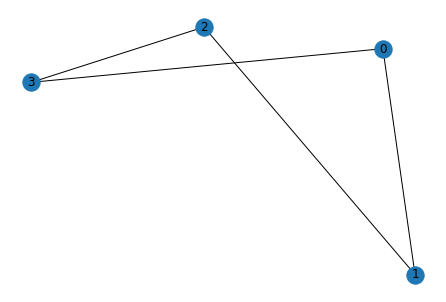

['0', '1', '2', '3']


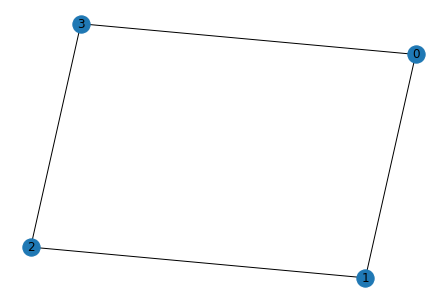

['0', '3', '2', '1']


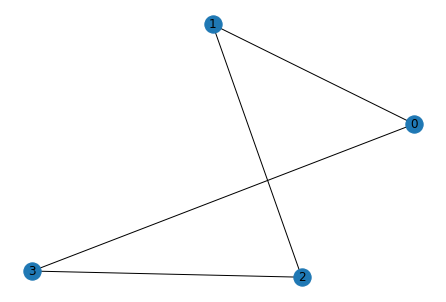

['1', '0', '3', '2']


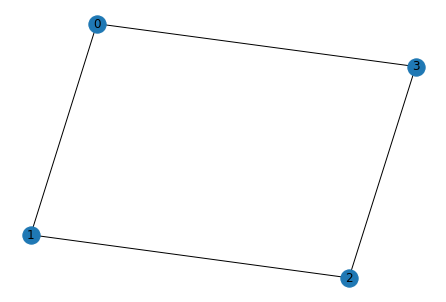

['1', '2', '3', '0']


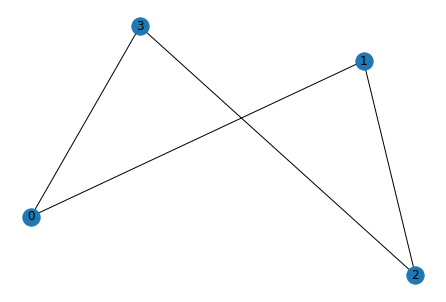

['2', '1', '0', '3']


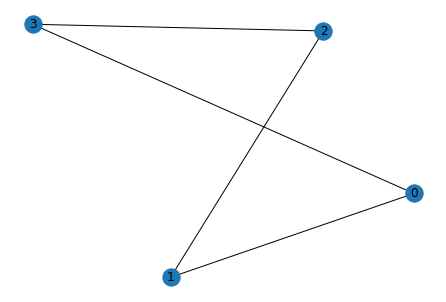

['2', '3', '0', '1']


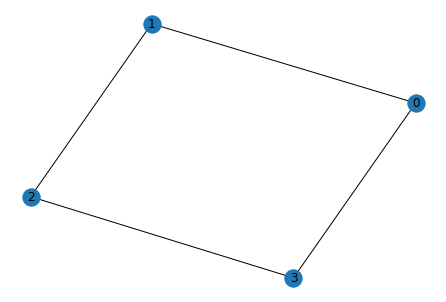

['3', '0', '1', '2']


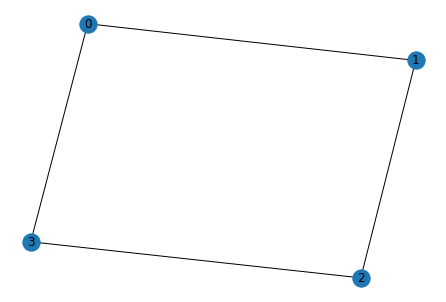

['3', '2', '1', '0']


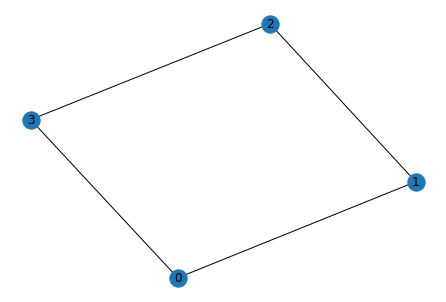

In [5]:
gps = []

for x in autG:
    g = nx.Graph()
    for v in x['vertices']:
        for u in x['vertices'][v]:
            g.add_edge(v, u)
            
    gps.append(g)
            
for i, g in enumerate(gps):
    print(autP[i])
    nx.draw(g, cmap = plt.get_cmap('jet'), with_labels = True)
    plt.show()

# Imprimir el grupo aut(g)

In [6]:
pmt_automorf = []

for i, x in enumerate(autP):
    if i > 0:
        rs = []
        for i, u in enumerate(x):
            v = grafo['nodos'][i]
            if u is not v and {u,v} not in rs:
                rs.append({u, v})
        pmt_automorf.append(rs)
        
print("el grupo aut(g) es: ")
string = "aut(g) = {"

for i, x in enumerate(pmt_automorf):        
    if i is 0:
        string += "e"
    else:
        string += str(x).replace("{", "(").replace("}", ")").replace("[", "").replace("]", "").replace("), ", ")").replace("'", "")
    if i is len(pmt_automorf) - 1:
        string += "}"
    else:
        string += " , "
        
print(string)

el grupo aut(g) es: 
aut(g) = {e , (3, 1) , (1, 0)(3, 2) , (1, 0)(1, 2)(3, 2)(3, 0) , (0, 2) , (0, 2)(3, 1) , (3, 0)(1, 0)(1, 2)(3, 2) , (3, 0)(1, 2)}
